# Tomamos 64 tipos de funciones de gabor 

In [5]:
from PIL import Image
import numpy 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from os.path import isfile, join
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import cv2

ruta = r'C:\Users\Marcelo Sanchez\Desktop\Segundo semestre CIMAT\Ciencia de Datos\Proyecto\datos'

contenido = os.listdir(ruta)

In [2]:
info = pd.read_csv('class.csv',encoding='latin1')
info

,Unnamed: 0,file,semantic.expression,file.expression
0,1,KA.AN1.39.tiff,ANG,ANG
1,2,KA.AN2.40.tiff,ANG,ANG
2,3,KA.AN3.41.tiff,DIS,ANG
3,4,KA.DI1.42.tiff,DIS,DIS
4,5,KA.DI2.43.tiff,DIS,DIS
...,...,...,...,...
175,176,YM.SA2.56.tiff,SAD,SAD
176,177,YM.SA3.57.tiff,SAD,SAD
177,178,YM.SU1.58.tiff,SUR,SUR
178,179,YM.SU2.59.tiff,SUR,SUR


In [3]:
archivos = [nombre for nombre in contenido if isfile(join(ruta, nombre))]
#print(archivos)

In [4]:


# Grayscale
def BGR2GRAY(img):
    # Grayscale
    gray = 0.2126 * img[..., 2] + 0.7152 * img[..., 1] + 0.0722 * img[..., 0]
    return gray

# Gabor Filter
def Gabor_filter(K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get half size
    d = K_size // 2

    # prepare kernel
    gabor = np.zeros((K_size, K_size), dtype=np.float32)

    # each value
    for y in range(K_size):
        for x in range(K_size):
            # distance from center
            px = x - d
            py = y - d

            # degree -> radian
            theta = angle / 180. * np.pi

            # get kernel x
            _x = np.cos(theta) * px + np.sin(theta) * py
    
            # get kernel y
            _y = -np.sin(theta) * px + np.cos(theta) * py

            # fill kernel
            gabor[y, x] = np.exp(-(_x**2 + Gamma**2 * _y**2) / (2 * Sigma**2)) * np.cos(2*np.pi*_x/Lambda + Psi)

    # kernel normalization
    gabor /= np.sum(np.abs(gabor))

    return gabor


# Utilice el filtro de Gabor para actuar sobre la imagen
def Gabor_filtering(gray, K_size=111, Sigma=10, Gamma=1.2, Lambda=10, Psi=0, angle=0):
    # get shape
    H, W = gray.shape

    # padding
    gray = np.pad(gray, (K_size//2, K_size//2), 'edge')

    # prepare out image
    out = np.zeros((H, W), dtype=np.float32)

    # get gabor filter
    gabor = Gabor_filter(K_size=K_size, Sigma=Sigma, Gamma=Gamma, Lambda=Lambda, Psi=0, angle=angle)
        
    # filtering
    for y in range(H):
        for x in range(W):
            out[y, x] = np.sum(gray[y : y + K_size, x : x + K_size] * gabor)

    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)

    return out


# Utilice 6 filtros Gabor con diferentes ángulos para realizar la extracción de características en la imagen
def Gabor_process(img):
    # get shape
    H, W, _ = img.shape

    # gray scale
    gray = BGR2GRAY(img).astype(np.float32)

    # define angle
    #As = [0, 45, 90, 135]
    As = [0,30,60,90,120,150]

    # prepare pyplot
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)

    out = np.zeros([H, W], dtype=np.float32)

    # each angle
    for i, A in enumerate(As):
        # gabor filtering
        _out = Gabor_filtering(gray, K_size=11, Sigma=1.5, Gamma=1.2, Lambda=3, angle=A)

        # add gabor filtered image
        out += _out

    # scale normalization
    out = out / out.max() * 255
    out = out.astype(np.uint8)

    return out

In [6]:
Todos_1 = []
g_kernel = cv2.getGaborKernel((30, 30), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)
for r in range(1):
    img = cv2.imread(join(ruta, archivos[r]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #con este nos dio un buen valor en maquinas de soporte vectorial
    filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)
    
    #out = Gabor_process(img)
    
    l = []
    p = filtered_img
    #for i in range(40):
    #    for j in range(190):
    #        l.append(p[i+50,j+30])
    sum1 = 0
    for i in range(256):
        for j in range(256):
            sum1 = sum1 + p[i,j]
    
    #for i in range(256):
     #   for j in range(256):
      #      l.append(out[i,j])
    
    Todos_1.append(l)#filtered_img

In [6]:
g_kernel = cv2.getGaborKernel((10, 10), np.pi/4, np.pi/2, 1.0, 0.8, 0.5, ktype=cv2.CV_32F)

img = cv2.imread("C:\\Users\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Proyecto\\datos\\KA.AN1.39.tiff")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

cv2.imshow('image', img)
cv2.imshow('filtered image', filtered_img)

h, w = g_kernel.shape[:2]
g_kernel = cv2.resize(g_kernel, (3*w, 3*h), interpolation=cv2.INTER_CUBIC)
cv2.imshow('gabor kernel (resized)', g_kernel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
import random
pi_i = 1
pi_f = 6

b_i = 1
b_f = 3

a = 0.1
b = 2.5

z = []
for i in range(64):
    p1 = random.randrange(pi_i,pi_f, 1)
    b1 = random.randrange(b_i,b_f, 1)
    c1 = random.randrange(0, 25, 1)
    d1 = random.randrange(0, 25, 1)
    g_kernel = cv2.getGaborKernel((10, 10), np.pi/p1, np.pi/b1, c1/10, d1/10, 0.5, ktype=cv2.CV_32F)
    z.append(g_kernel)
#z

In [46]:
Todos_1 = []
#g_kernel = cv2.getGaborKernel((30, 30), np.pi/4, np.pi/2, 2.5, 0.8, 1.0, ktype=cv2.CV_32F)
for r in range(180):
    img = cv2.imread(join(ruta, archivos[r]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #con este nos dio un buen valor en maquinas de soporte vectorial
    l = []
    for i in range(64):
        filtered_img = cv2.filter2D(img/255, cv2.CV_8UC3, z[i])
        sum1 = 0
        for i in range(256):
            for j in range(256):
                sum1 = sum1 + filtered_img[i,j]
        l.append(sum1)
    Todos_1.append(l)#filtered_img

In [47]:
v = pd.DataFrame(Todos_1)
v

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,336593,9,15641,118,55722,0,1061,41574,2156,0,...,4,14,0,43411,55482,78671,105,140014,33419,203983
1,337795,1,17050,77,54468,3,1297,43410,2944,1,...,2,3,0,44977,54400,78899,167,141441,35964,204822
2,318216,2,13448,99,53167,0,599,40614,1514,0,...,1,28,0,41943,52908,73426,86,133680,31507,191054
3,330878,9,15554,66,53875,1,633,43205,1674,1,...,4,2,0,44964,53524,77228,79,138731,34615,200000
4,322801,4,14296,44,52936,1,524,42010,1382,2,...,4,3,0,43515,52620,74783,141,135013,33468,194579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,403786,59,27986,81,68069,3,15149,46450,19687,36,...,28,4,0,46778,67933,92212,307,167309,43249,243563
176,422868,56,30304,94,71985,6,18532,47301,23110,52,...,20,9,3,47524,71784,96928,255,174841,44894,253585
177,411091,63,29610,111,70091,13,16993,46265,21489,61,...,21,17,4,46596,69923,94134,317,170689,42792,247137
178,386298,45,25983,47,65370,5,11792,45525,16640,34,...,23,16,2,45924,65437,87708,285,159481,40683,233716


In [48]:
from sklearn.decomposition import PCA
pca = PCA()
# ajustar en los datos (estandarizados)
pca.fit(v)

r = pca.transform(v)
comps = pd.DataFrame(data=r)
comps

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-108267.753412,-9720.890210,7.118310,-1796.007044,-22.312407,990.437115,2864.303240,-1239.521978,307.466394,-373.303375,...,3.455742,1.333547,-0.486065,0.261311,0.507355,0.281417,-0.265380,-0.022362,4.788072e-13,-7.326067e-13
1,-100900.037395,-9091.998514,2812.736909,-6030.290499,1001.775422,1109.043038,842.759098,344.177041,706.067412,146.737591,...,2.423918,2.415971,0.289034,0.033471,-0.573834,0.264125,0.147477,-0.000152,-1.459641e-13,-1.636792e-12
2,-209077.856585,-9927.277729,-2062.315888,-4294.712968,1578.993464,853.484076,-546.829220,-91.938482,-1182.722215,-1282.463898,...,-1.251483,0.298268,0.795104,-1.196829,0.213058,0.237948,-0.713245,0.083498,1.252565e-12,-4.595080e-12
3,-137077.547019,-11538.918946,1814.438431,-6760.835177,1176.738525,1365.626926,393.432088,-393.803174,-348.634861,-396.092713,...,-0.037896,-0.728013,-0.974248,-1.308598,0.431738,0.370631,-0.000377,-0.097963,-8.283866e-14,-1.626906e-12
4,-185466.878930,-11102.454724,295.515897,-6624.812129,1882.061621,1111.976057,237.121678,-165.471713,-237.466055,-128.762269,...,-2.862772,-1.404526,-0.341338,-1.224355,0.905143,0.594159,0.103534,0.181771,-2.469104e-13,-3.421950e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,285553.147418,18670.404893,-4328.684836,-402.639727,723.016491,-725.572943,832.032422,-781.168750,-415.180420,356.567198,...,-3.342789,2.111092,1.278273,0.452457,-0.473680,0.785505,0.217006,0.099387,-5.619266e-14,7.393230e-12
176,396093.780859,23454.532612,-7254.620775,2258.187085,2500.681491,-358.802296,-579.021328,-2932.687074,-2127.964961,404.381371,...,-0.334014,-0.932726,-3.338469,-0.181825,0.568864,-0.883055,0.219327,-0.127007,-8.758850e-13,6.896505e-12
177,330889.378197,21600.398736,-7342.938306,1487.514378,2178.898569,-318.811402,286.547008,-2682.811995,-2473.440227,-578.203153,...,4.383294,0.244084,-4.044023,0.748824,-1.629024,0.013931,0.008524,-0.475900,9.201946e-14,1.862781e-12
178,176317.849334,13520.513931,-4460.420717,-1932.426548,-333.788056,-729.378871,1581.833167,989.798954,1806.909094,2728.442016,...,-1.760660,-0.308405,-0.594260,0.525775,-0.324429,1.618827,0.950048,0.030554,-1.278996e-12,2.990021e-12


In [52]:
dat = {'PC':range(0,64),'std':np.sqrt(pca.explained_variance_), 'var_prop':pca.explained_variance_ratio_, 
       'cum_prop':np.cumsum(pca.explained_variance_ratio_)}
stds = pd.DataFrame(dat)
stds

,PC,std,var_prop,cum_prop
0,0,2.620477e+05,9.981926e-01,0.998193
1,1,7.776577e+03,8.790847e-04,0.999072
2,2,5.422943e+03,4.274880e-04,0.999499
3,3,4.380936e+03,2.789893e-04,0.999778
4,4,2.098800e+03,6.403184e-05,0.999842
...,...,...,...,...
59,59,6.595437e-01,6.323258e-12,1.000000
60,60,5.485289e-01,4.373738e-12,1.000000
61,61,3.392013e-01,1.672510e-12,1.000000
62,62,2.578248e-11,9.662805e-33,1.000000


Text(0.5, 1.0, 'Varianza acumulada')

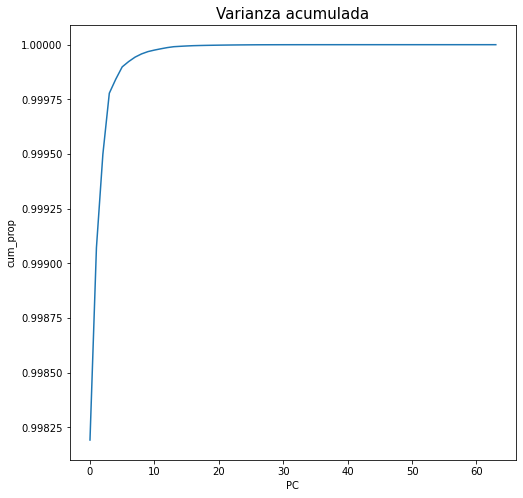

In [53]:
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.lineplot(x="PC", y="cum_prop", data=stds)
plt.title('Varianza acumulada', fontsize=15)

In [54]:
datos_lim = comps.iloc[:,0:10]
datos_lim

,0,1,2,3,4,5,6,7,8,9
0,-108267.753412,-9720.890210,7.118310,-1796.007044,-22.312407,990.437115,2864.303240,-1239.521978,307.466394,-373.303375
1,-100900.037395,-9091.998514,2812.736909,-6030.290499,1001.775422,1109.043038,842.759098,344.177041,706.067412,146.737591
2,-209077.856585,-9927.277729,-2062.315888,-4294.712968,1578.993464,853.484076,-546.829220,-91.938482,-1182.722215,-1282.463898
3,-137077.547019,-11538.918946,1814.438431,-6760.835177,1176.738525,1365.626926,393.432088,-393.803174,-348.634861,-396.092713
4,-185466.878930,-11102.454724,295.515897,-6624.812129,1882.061621,1111.976057,237.121678,-165.471713,-237.466055,-128.762269
...,...,...,...,...,...,...,...,...,...,...
175,285553.147418,18670.404893,-4328.684836,-402.639727,723.016491,-725.572943,832.032422,-781.168750,-415.180420,356.567198
176,396093.780859,23454.532612,-7254.620775,2258.187085,2500.681491,-358.802296,-579.021328,-2932.687074,-2127.964961,404.381371
177,330889.378197,21600.398736,-7342.938306,1487.514378,2178.898569,-318.811402,286.547008,-2682.811995,-2473.440227,-578.203153
178,176317.849334,13520.513931,-4460.420717,-1932.426548,-333.788056,-729.378871,1581.833167,989.798954,1806.909094,2728.442016


In [55]:
from sklearn.model_selection import train_test_split
y = info.iloc[:,3]
X_train, X_test = train_test_split(datos_lim, test_size=0.2, train_size=0.8, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.2, train_size=0.8, random_state=42)

### Maquinas de Soporte Vectorial

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=2.5)
clf.fit(X_train, y_train)
y_pred_hat = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred_hat))
#plt.rcParams['figure.figsize'] = (8, 6)
#disp1 = metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
#disp1.ax_.set_title('Matriz de confusion. Sin normalizar',{'fontsize':15})
#plt.show()

### Redes Neuronales

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

hls = [10] #[10,3]
# regularización
a = 0.5
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=hls, 
                    random_state=0, alpha=a, max_iter=500).fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print(metrics.classification_report(y_test, y_pred))